# Task 2: Predicting customer buying behaviour
## 4. Feature selection

## Import libraries

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import RFE
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.inspection import permutation_importance

## Load the data

In [9]:
df = pd.read_pickle("df_transformed.pickle")

## Supervised methods

#### Separate x and y

In [10]:
target = "booking_complete"
x = df.drop(columns=target).copy()
y = df[target].copy()

### Mutual information

#### Create a function to show the results

In [11]:
def ranking_mi(mutual_selector, mode = 'table'):
    #Create the ranking
    ranking_mi = pd.DataFrame(mutual_selector, index = x.columns).reset_index()
    ranking_mi.columns = ['variable','importance_mi']
    ranking_mi = ranking_mi.sort_values(by = 'importance_mi', ascending = False)
    ranking_mi['ranking_mi'] = np.arange(0,ranking_mi.shape[0])
    #Shows the output
    if mode == 'table':
        return(ranking_mi)
    else:
        g = ranking_mi.importancia_mi.sort_values().plot.barh(figsize = (12,20))
        g.set_yticklabels(ranking_mi.sort_values(by = 'importance_mi').variable)
        return(g)

#### Calculate and show the output

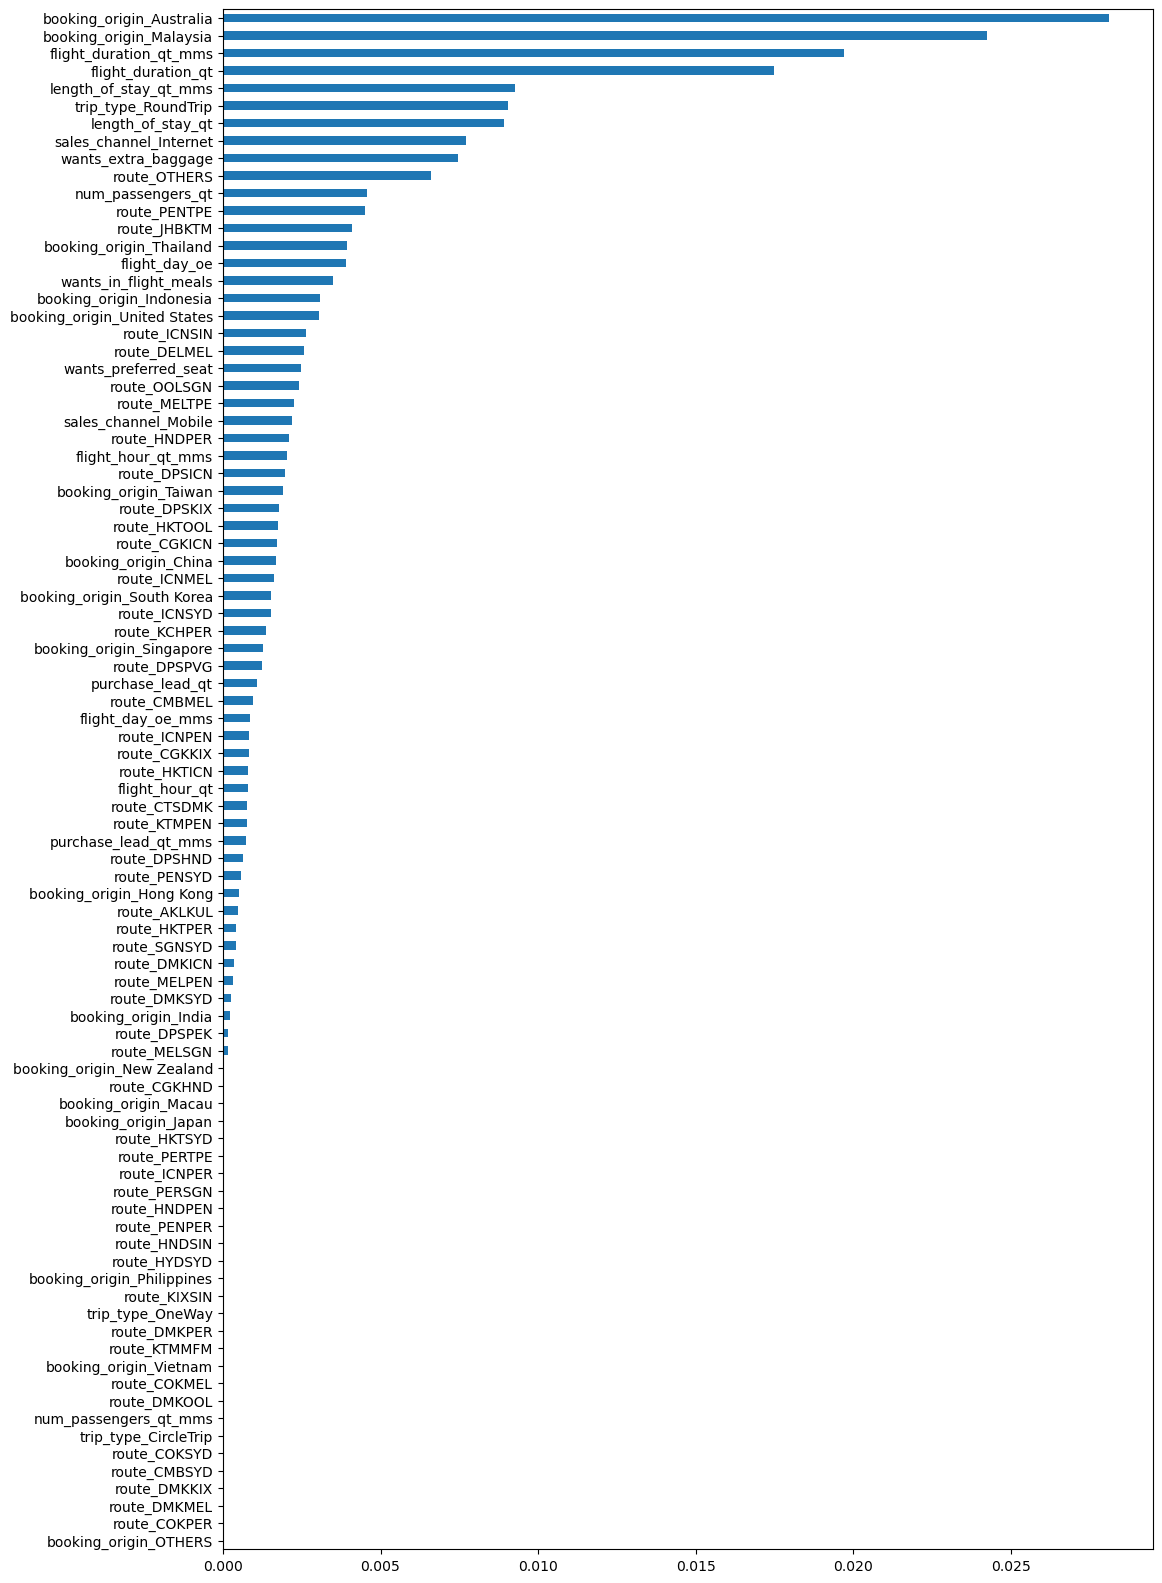

In [13]:
mutual_selector = mutual_info_classif(x,y)

rank_mi = ranking_mi(mutual_selector, mode = 'plot')

### Recursive Feature Elimination

#### Instantiate

In [17]:
rfe = RFE(estimator = XGBClassifier(n_jobs = -1, eval_metric='auc'))

#### Fit

In [18]:
rfe.fit(x,y)

RFE(estimator=XGBClassifier(base_score=None, booster=None, callbacks=None,
                            colsample_bylevel=None, colsample_bynode=None,
                            colsample_bytree=None, early_stopping_rounds=None,
                            enable_categorical=False, eval_metric='auc',
                            feature_types=None, gamma=None, gpu_id=None,
                            grow_policy=None, importance_type=None,
                            interaction_constraints=None, learning_rate=None,
                            max_bin=None, max_cat_threshold=None,
                            max_cat_to_onehot=None, max_delta_step=None,
                            max_depth=None, max_leaves=None,
                            min_child_weight=None, missing=nan,
                            monotone_constraints=None, n_estimators=100,
                            n_jobs=-1, num_parallel_tree=None, predictor=None,
                            random_state=None, ...))

#### Show the output variables

In [19]:
entran_rfe = x.columns[rfe.support_]
entran_rfe

Index(['sales_channel_Internet', 'trip_type_RoundTrip', 'route_AKLKUL',
       'route_CGKHND', 'route_CGKKIX', 'route_CMBMEL', 'route_CMBSYD',
       'route_DELMEL', 'route_DMKKIX', 'route_DMKPER', 'route_DPSICN',
       'route_HKTICN', 'route_ICNMEL', 'route_ICNPEN', 'route_ICNPER',
       'route_ICNSIN', 'route_ICNSYD', 'route_KIXSIN', 'route_MELTPE',
       'route_OOLSGN', 'route_OTHERS', 'route_PENTPE', 'route_SGNSYD',
       'booking_origin_Australia', 'booking_origin_China',
       'booking_origin_Hong Kong', 'booking_origin_India',
       'booking_origin_Indonesia', 'booking_origin_Japan',
       'booking_origin_Macau', 'booking_origin_Malaysia',
       'booking_origin_New Zealand', 'booking_origin_OTHERS',
       'booking_origin_Philippines', 'booking_origin_Singapore',
       'booking_origin_South Korea', 'booking_origin_Taiwan',
       'booking_origin_Thailand', 'booking_origin_Vietnam',
       'length_of_stay_qt', 'flight_duration_qt', 'wants_extra_baggage',
       'wants_pr

### Permutation Importance

#### Create a function to show the results

In [14]:
def ranking_per(predictors,permutation):
    ranking_per = pd.DataFrame({'variable': predictors.columns, 'importance_per': permutation.importances_mean}).sort_values(by = 'importance_per', ascending = False)
    ranking_per['ranking_per'] = np.arange(0,ranking_per.shape[0])
    return(ranking_per)

#### Instantiate and fit the method

In [15]:
import warnings
warnings.filterwarnings(action="ignore", message=r'.*Use subset.*of np.ndarray is not recommended')

xgb = XGBClassifier(use_label_encoder=False, n_jobs = -1, eval_metric='auc')

xgb.fit(x,y)

#Use of roc auc for the scoring method
permutation = permutation_importance(xgb, 
                                     x, y, 
                                     scoring = 'roc_auc',
                                     n_repeats=5, n_jobs = -1)

c:\Users\Luis\miniconda3\envs\project_BA\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


#### Check the output

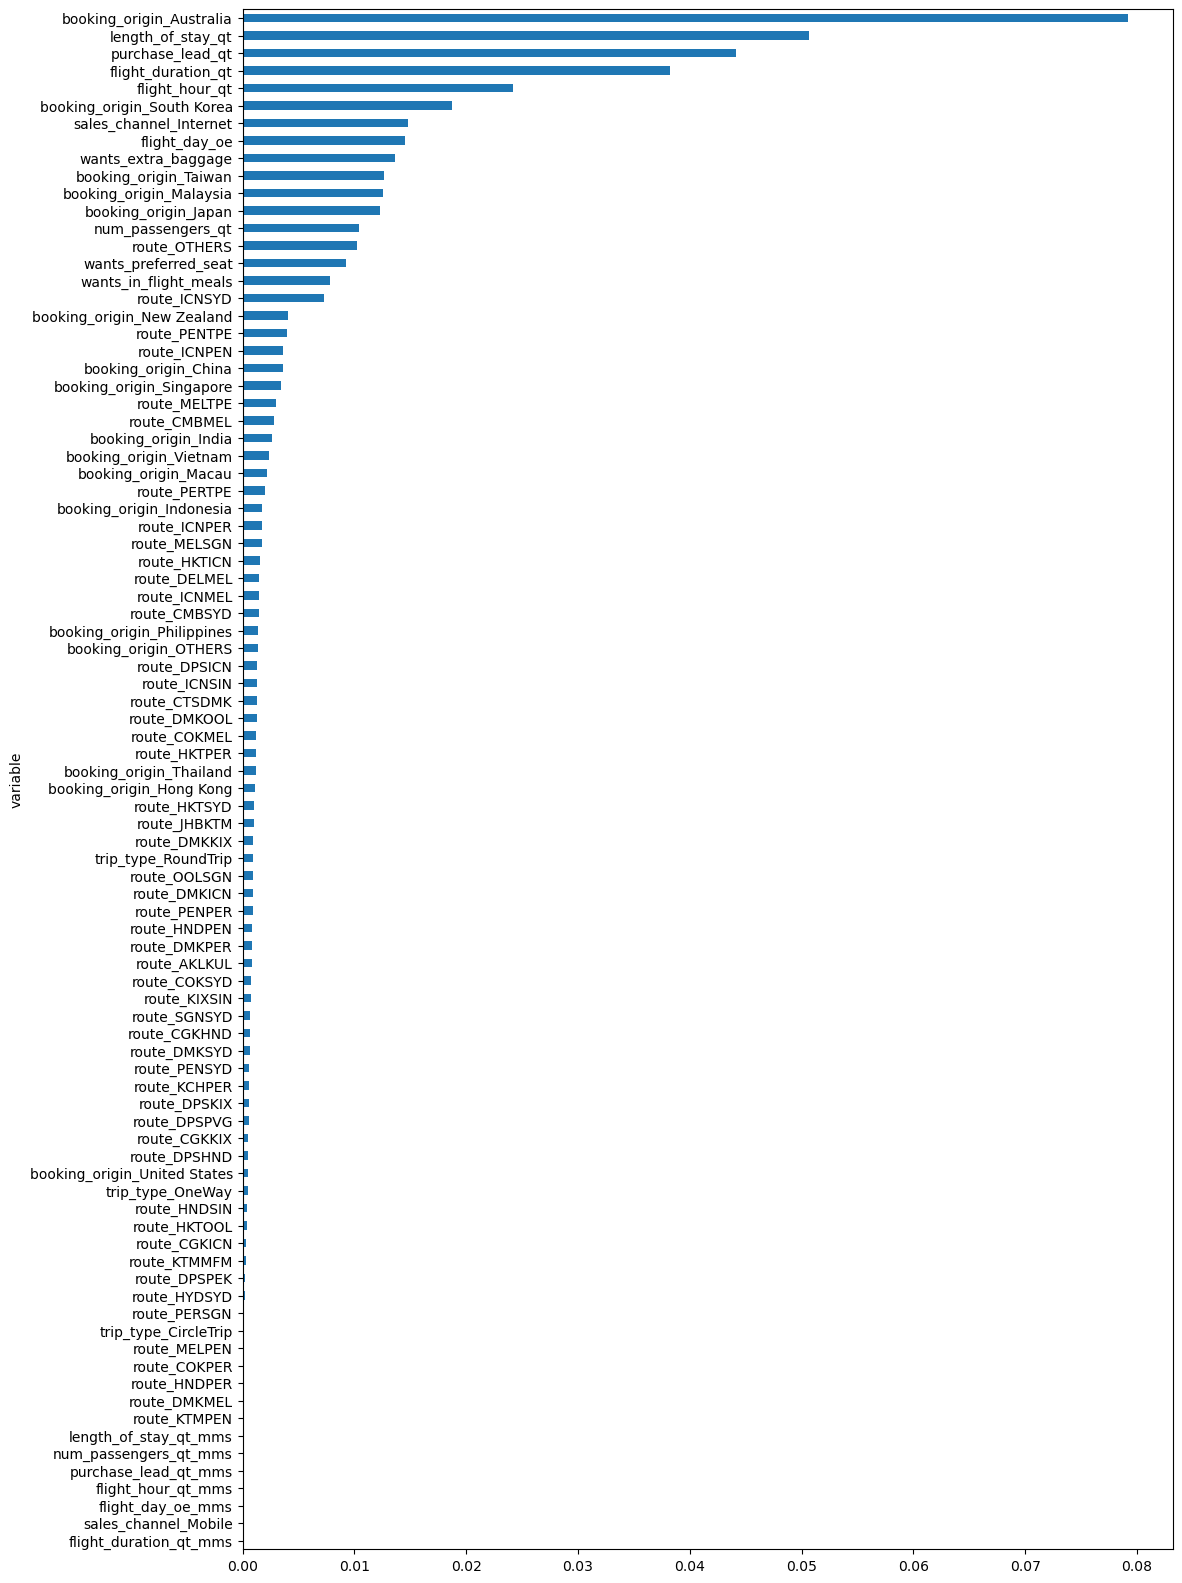

In [16]:
rank_per = ranking_per(x,permutation)

rank_per.set_index('variable').importance_per.sort_values().plot.barh(figsize = (12,20));

### Select Permutation Importance variables

In [ ]:
select_permutation = 